In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima


## TASK - 1

In [28]:
test_df = pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv")
test_df['date'] = pd.to_datetime(test_df['date'])
test_df = test_df.set_index('date')
test_df      

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-02-01,18.500000,77.222222,2.894444,1018.277778
2017-03-01,17.111111,81.888889,4.016667,1018.333333
2017-04-01,18.700000,70.050000,4.545000,1015.700000
2017-05-01,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [29]:
train_df = pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv")
train_df['date'] = pd.to_datetime(train_df['date'])
train_df = train_df.set_index('date')
train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [30]:
df = pd.concat([train_df, test_df])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


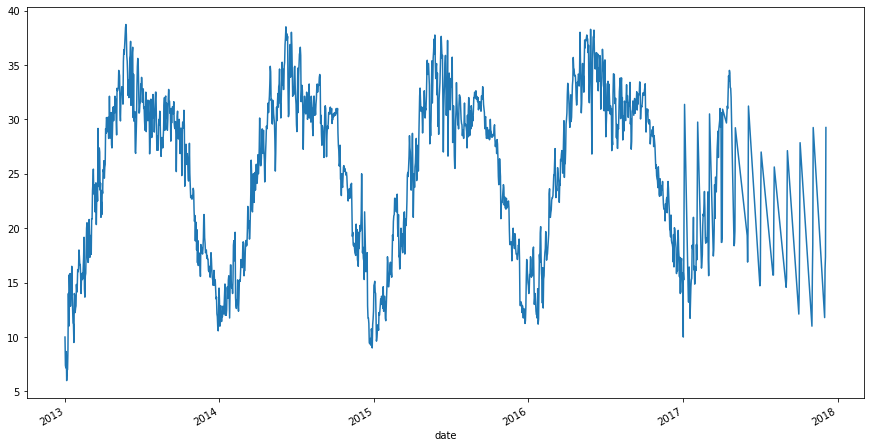

In [31]:
df['meantemp'].plot(figsize=(15,8))
plt.show()

In [32]:
#sample data with respect to 7 days
df1 = df.resample('7D').mean()
print(df1)                           

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01   7.604762  83.295238    2.903810   1017.685714
2013-01-08  13.176871  66.511905    8.013265   1015.942177
2013-01-15  13.409524  80.068027    4.471905   1017.972789
2013-01-22  12.848639  64.748299    4.981973   1019.884694
2013-01-29  16.107653  70.279592    3.396378   1016.554592
...               ...        ...         ...           ...
2017-10-31  18.602083  53.565278    8.700347   1012.363194
2017-11-07        NaN        NaN         NaN           NaN
2017-11-14        NaN        NaN         NaN           NaN
2017-11-21        NaN        NaN         NaN           NaN
2017-11-28  18.666118  56.894737    6.344079   1014.154605

[257 rows x 4 columns]


In [33]:
df1=df1.dropna()

In [34]:
df_meantemp = df1[['meantemp']]
print(df_meantemp)

             meantemp
date                 
2013-01-01   7.604762
2013-01-08  13.176871
2013-01-15  13.409524
2013-01-22  12.848639
2013-01-29  16.107653
...               ...
2017-08-29  19.464286
2017-09-26  13.388889
2017-10-03  23.897321
2017-10-31  18.602083
2017-11-28  18.666118

[236 rows x 1 columns]


### Split data into 70:30

In [35]:
ss = int(np.round(len(df_meantemp) * 0.7,0))
print('actual length = {}, sample size = {}'.format(len(df_meantemp), ss))
train = df_meantemp[:ss]
test = df_meantemp[ss:]
print('train = {}, test = {}'.format(len(train), len(test)))


actual length = 236, sample size = 165
train = 165, test = 71


In [36]:
train.tail(5)

,meantemp
date,
2016-01-26,17.418498
2016-02-02,15.067316
2016-02-09,18.157084
2016-02-16,20.739155
2016-02-23,22.593367


In [37]:
test.head(5)

,meantemp
date,
2016-03-01,24.803231
2016-03-08,24.177891
2016-03-15,25.864031
2016-03-22,26.588690
2016-03-29,30.815051


In [38]:
# dickey-fuller test for stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [39]:
ret=checkStationarity(train); 
ret                                                

'p-value=0.0001678655068831954. Data is stationary'

### Plot ACF and PACF

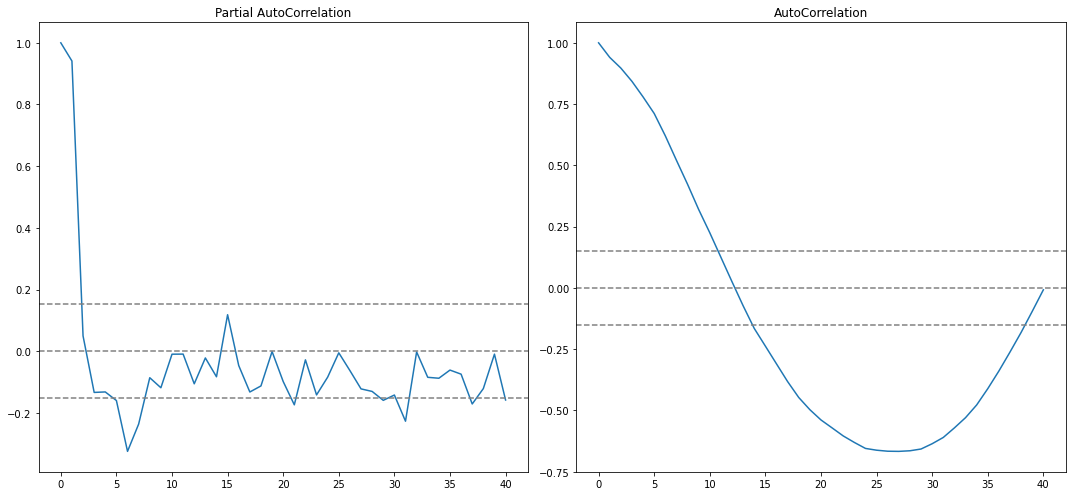

In [40]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(train, nlags=40)
lag_pacf = pacf(train , nlags=40, method='ols')
fig,ax = plt.subplots(1,2,figsize=(15, 7))
# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

### Use auto ARIMA for selection of p, d, q

In [41]:
# auto ARIMA (to help in the selection of p,d,q)
from pmdarima.arima import auto_arima
m1 = auto_arima(train['meantemp'],start_p=0,max_p=2, start_q=0,max_q=2, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1540.633, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1335.757, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=730.138, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=731.339, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=729.773, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1182.602, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=718.935, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=692.582, Time=0.72 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=727.671, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=729.670, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=728.428, Time=0.18 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 2.763 seconds
                               SARIMAX Results                                
Dep. Variable:        

## TASK - 2

### Build the ARIMA model

In [42]:
# start with initial values for p and q based on auto_arima recommendation
p=2; d=0; q=2
m1 = ARIMA(train['meantemp'],order=(p,d,q)).fit()
print(m1.summary())       

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  165
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -338.184
Date:                Fri, 29 Apr 2022   AIC                            688.369
Time:                        10:03:21   BIC                            707.004
Sample:                    01-01-2013   HQIC                           695.934
                         - 02-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9591      0.202    123.399      0.000      24.563      25.355
ar.L1          1.9739      0.006    328.037      0.000       1.962       1.986
ar.L2         -0.9894      0.006   -169.911      0.0

### Predict temperature using the model

In [43]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')
print(predictions)



start = 165, end = 235
2016-03-01    22.645899
2016-03-08    23.506504
2016-03-15    24.380603
2016-03-22    25.254454
2016-03-29    26.114467
                ...    
2017-06-06    29.935237
2017-06-13    29.830031
2017-06-20    29.650164
2017-06-27    29.399223
2017-07-04    29.081864
Freq: W-TUE, Name: predicted_mean, Length: 71, dtype: float64


### Collate actual, predicted, and error values together

In [44]:
# actual vs predicted values

actual = []
pred = []

for i in range(len(predictions)):
    actual.append(test['meantemp'][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual  predicted        err
0   24.803231  22.645899   2.157332
1   24.177891  23.506504   0.671387
2   25.864031  24.380603   1.483428
3   26.588690  25.254454   1.334236
4   30.815051  26.114467   4.700584
..        ...        ...        ...
66  19.464286  29.935237 -10.470951
67  13.388889  29.830031 -16.441143
68  23.897321  29.650164  -5.752843
69  18.602083  29.399223 -10.797140
70  18.666118  29.081864 -10.415745

[71 rows x 3 columns]


### Plotting errors 

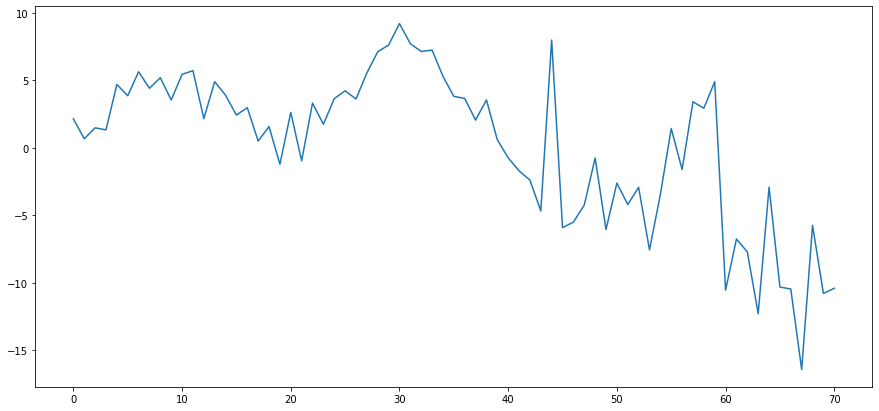

In [45]:
# errors
fig,ax = plt.subplots(figsize=(15, 7))
df_res.err.plot()
plt.show()

### Box-Jenkins test to check model's goodness

In [46]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Calculate error terms

In [47]:
df_res=df_res.dropna()
df_res

,actual,predicted,err
0,24.803231,22.645899,2.157332
1,24.177891,23.506504,0.671387
2,25.864031,24.380603,1.483428
3,26.588690,25.254454,1.334236
4,30.815051,26.114467,4.700584
...,...,...,...
66,19.464286,29.935237,-10.470951
67,13.388889,29.830031,-16.441143
68,23.897321,29.650164,-5.752843
69,18.602083,29.399223,-10.797140


In [48]:
# MSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))  

ARIMA Model. Order=(2,0,2)
	MSE = 32.091847536484345
	RMSE = 5.664966684499066


### Plot actual vs. predicted values

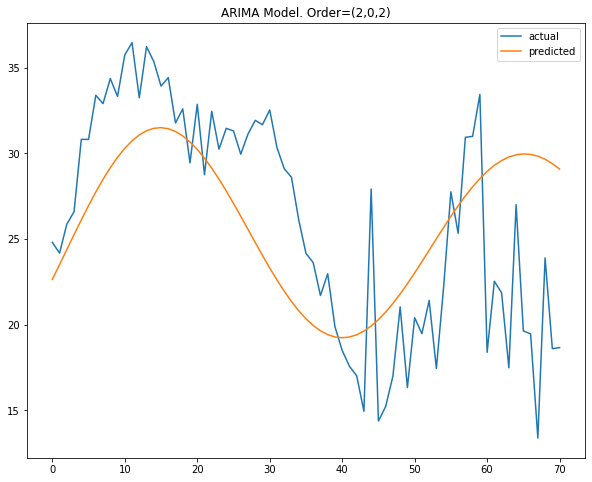

In [49]:
df_res.actual.plot(figsize=(10,8),legend=True)      
df_res.predicted.plot(legend=True)                   
plt.title(msg)
plt.show()

## TASK - 3 

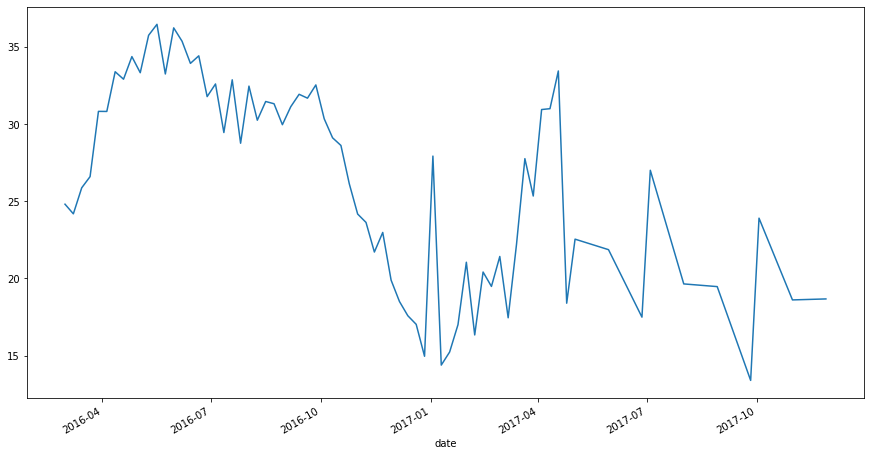

In [50]:
test['meantemp'].plot(figsize=(15,8))  
plt.show()

### Build the SARIMA model

In [94]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=1; q=1; d=1;
m1 = sm.tsa.statespace.SARIMAX(df['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,52)).fit() 

### Use the model to predict the value


In [95]:
# predict
predictions = m1.predict(start=90,end=104,dynamic=True)
print(predictions)

date
2013-04-01    21.495664
2013-04-02    22.863496
2013-04-03    22.649513
2013-04-04    23.253758
2013-04-05    22.699753
2013-04-06    23.644487
2013-04-07    24.686853
2013-04-08    26.515746
2013-04-09    21.772711
2013-04-10    21.003842
2013-04-11    22.926094
2013-04-12    23.164719
2013-04-13    24.990319
2013-04-14    27.221975
2013-04-15    27.629171
Name: predicted_mean, dtype: float64


### Collate actual, predicted, and errors together

In [96]:
actual = []
pred = []

for i in range(len(predictions)):
    actual.append(df['meantemp'][i])
    pred.append(predictions[i])

df_res1 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

       actual  predicted        err
0   10.000000  21.495664 -11.495664
1    7.400000  22.863496 -15.463496
2    7.166667  22.649513 -15.482846
3    8.666667  23.253758 -14.587091
4    6.000000  22.699753 -16.699753
5    7.000000  23.644487 -16.644487
6    7.000000  24.686853 -17.686853
7    8.857143  26.515746 -17.658603
8   14.000000  21.772711  -7.772711
9   11.000000  21.003842 -10.003842
10  15.714286  22.926094  -7.211808
11  14.000000  23.164719  -9.164719
12  15.833333  24.990319  -9.156986
13  12.833333  27.221975 -14.388642
14  14.714286  27.629171 -12.914885


### Calculate error terms

In [97]:
new_df=df_res1.dropna()

In [98]:
# MSE
mse = mean_squared_error(new_df.actual, new_df.predicted)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse,np.sqrt(mse)))


	MSE = 183.90101668307778
	RMSE = 13.561010901959992


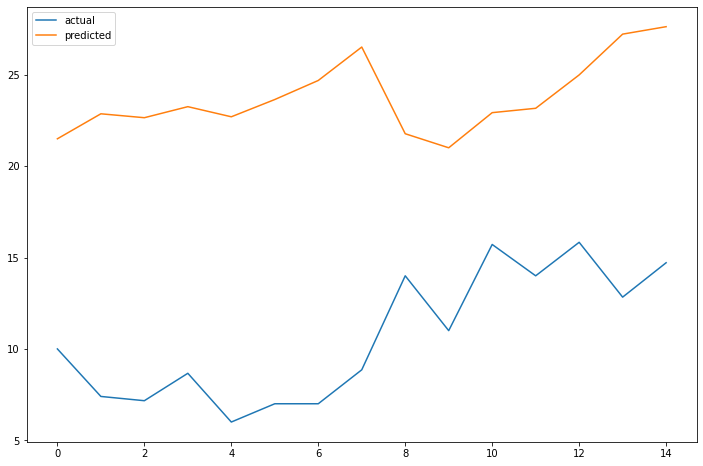

In [99]:
# plot
new_df[['actual','predicted']].plot(figsize=(12,8))
plt.show()

### Forecast the future values using the model

In [101]:
# forecast into the future
p=1; q=1; d=1
m2 = sm.tsa.statespace.SARIMAX(df['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,52)).fit()
fcast = m2.predict(start=len(df), end=len(df)+11, typ='levels').rename('Forecast')
print(fcast)

1576    32.059160
1577    32.263256
1578    31.916519
1579    31.859176
1580    32.259332
1581    31.918698
1582    32.296804
1583    32.257423
1584    32.354632
1585    32.227410
1586    32.176411
1587    32.268082
Name: Forecast, dtype: float64


### Visualize the forecast

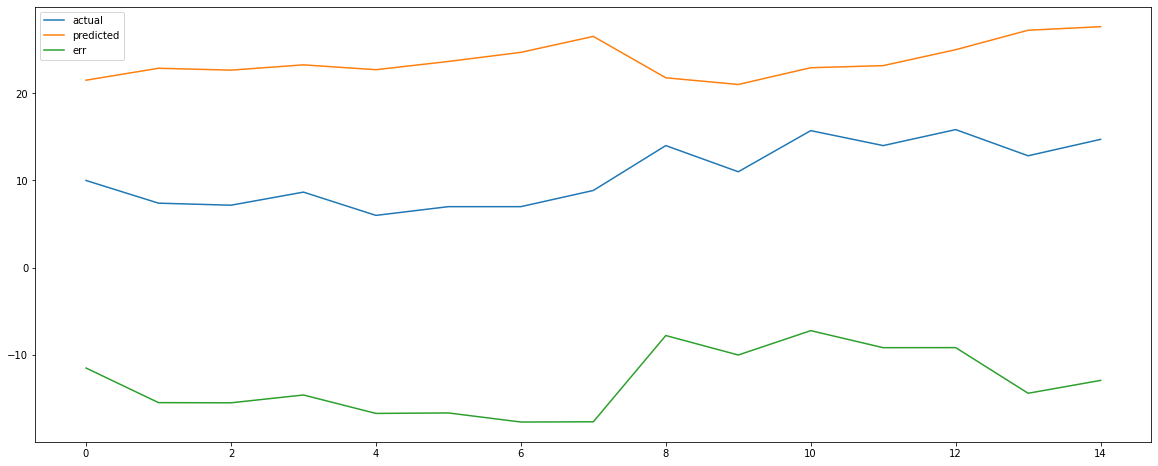

In [102]:
new_df.plot(figsize=(20,8),legend=True)
plt.show() 

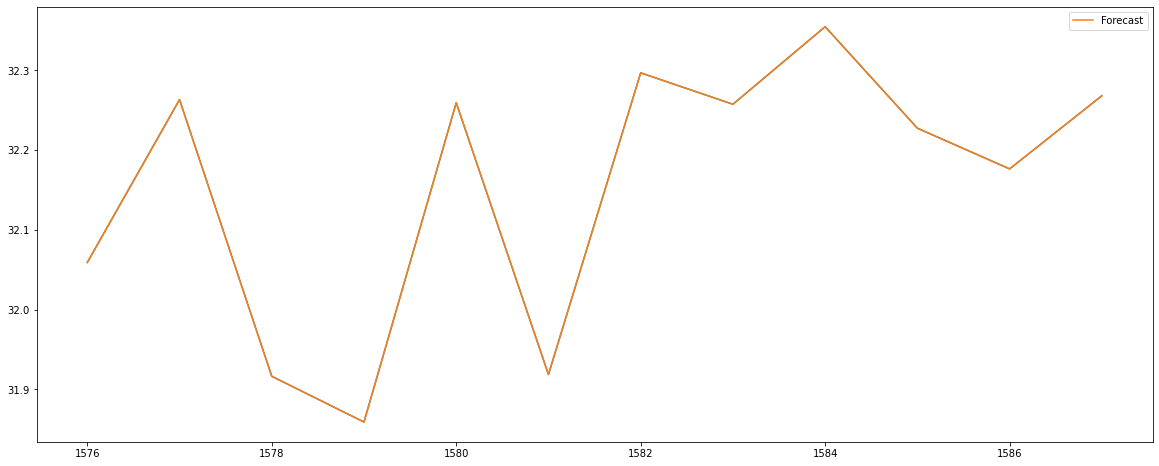

In [104]:
fcast.plot(figsize=(20,8))
fcast.plot(legend=True)                    
plt.show() 

## TASK - 4 

### Sarima

In [62]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=2; d=0;  q=2;
m1 = sm.tsa.statespace.SARIMAX(df['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,52)).fit() 

In [63]:
# D = daily
# M = monthly
temp = df.resample('D').mean()       

In [64]:
new_temp=temp.dropna()

In [65]:
print(len(new_temp))

1575


In [66]:
print(new_temp)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
...               ...        ...         ...           ...
2017-11-04  29.250000  17.750000   15.512500   1006.250000
2017-12-01  11.789474  74.578947    6.626316   1016.368421
2017-12-02  16.250000  70.375000    1.625000   1019.625000
2017-12-03  17.375000  56.625000    7.637500   1014.750000
2017-12-04  29.250000  26.000000    9.487500   1005.875000

[1575 rows x 4 columns]


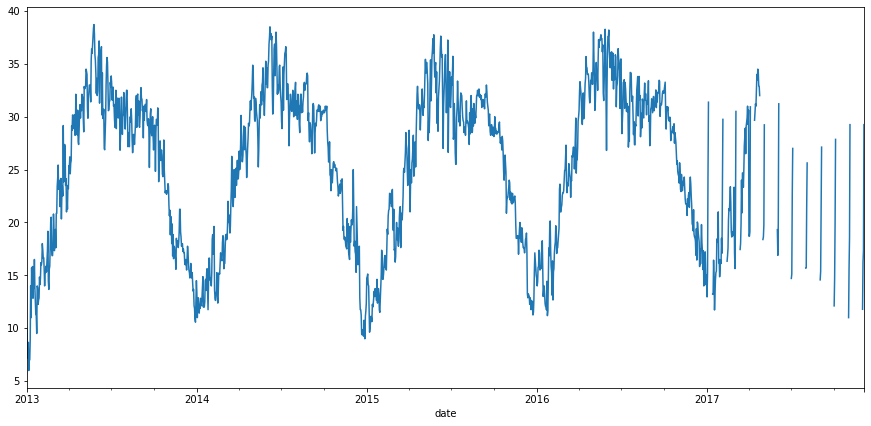

In [67]:
fig,ax = plt.subplots(figsize=(15, 7))
temp.meantemp.plot()
plt.show()

### Check for stationarity

In [68]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [69]:
checkStationarity(new_temp['meantemp'])

'pvalue=0.030596787401161757. Data is Stationary. Proceed to model building'

### Split data into an 80:20 ratio

In [70]:
# split the data into train and test
ss = int(0.80 * len(new_temp))
train_df1 = new_temp.iloc[:ss]
test_df1 = new_temp.iloc[ss:]
print(train_df1)                           
print(test_df1)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
...               ...        ...         ...           ...
2016-06-09  35.733333  43.733333    9.260000    938.066667
2016-06-10  36.133333  41.866667   10.081250    998.250000
2016-06-11  33.437500  49.937500    8.812500    999.000000
2016-06-12  35.500000  37.125000    9.162500    998.812500
2016-06-13  36.000000  43.312500   12.850000    998.187500

[1260 rows x 4 columns]
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-06-14  32.625000  55.125000   11.860000    997.812500
2016-06-15  34.733333  48.86666

### Split exogenous data into train and test parts

In [71]:
exog_train = train_df1[['humidity','wind_speed','meanpressure']]
exog_test = test_df1[['humidity','wind_speed','meanpressure']]

In [72]:
print(exog_train.head(5))

             humidity  wind_speed  meanpressure
date                                           
2013-01-01  84.500000    0.000000   1015.666667
2013-01-02  92.000000    2.980000   1017.800000
2013-01-03  87.000000    4.633333   1018.666667
2013-01-04  71.333333    1.233333   1017.166667
2013-01-05  86.833333    3.700000   1016.500000


In [73]:
print(exog_test.head(5))

             humidity  wind_speed  meanpressure
date                                           
2016-06-14  55.125000   11.860000    997.812500
2016-06-15  48.866667   10.513333    996.133333
2016-06-16  51.285714   11.392857    999.000000
2016-06-17  52.250000    7.425000    999.428571
2016-06-18  50.571429   10.857143   1000.857143


In [74]:
print('exog_train = {}, train = {}'.format( len(exog_train), len(train_df1)))

exog_train = 1260, train = 1260


### Build the SARIMA model

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df1['meantemp'], order=(1,0,4), seasonal_order=(1,0,0,52), exog = exog_train.values).fit()

### Forecast using the model

In [86]:
forecast = model.forecast(len(test_df1), exog=exog_test.values)
forecast

2016-06-14    34.317180
2016-06-15    34.593057
2016-06-16    33.769977
2016-06-17    33.483458
2016-06-18    33.259406
                ...    
2017-04-20    -0.218968
2017-04-21    -7.511170
2017-04-22    -6.850603
2017-04-23    -5.213458
2017-04-24    -1.242681
Freq: D, Name: predicted_mean, Length: 315, dtype: float64

### Plot actual and forecasted values also calculate error term

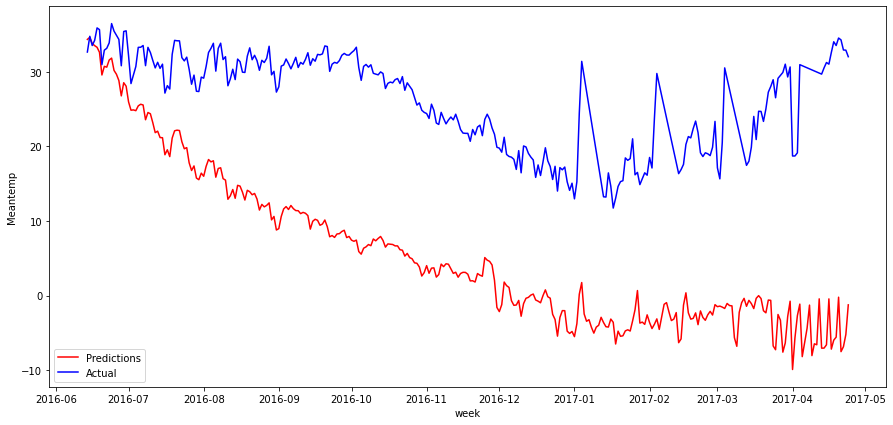

RMSE: 21.09706591805998


In [93]:
plt.figure(figsize=(15,7))
plt.plot(forecast, 'r', label = 'Predictions')
plt.plot(test_df1.meantemp[:283], 'b', label='Actual')
plt.xlabel('week')
plt.ylabel('Meantemp')
plt.legend()
plt.show()

mse1 = mean_squared_error(test_df1['meantemp'],forecast)
print('RMSE: ' + str(np.sqrt(mse1) ))